In [17]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

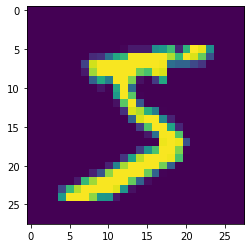

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2117 - accuracy: 0.9533 - val_loss: 0.0940 - val_accuracy: 0.9705
Epoch 2/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0685 - accuracy: 0.9793 - val_loss: 0.0897 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0740 - val_accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0923 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.1101 - val_accuracy: 0.9783


In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11005713790655136, 0.9782999753952026]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 76ms/step
[[3.6873386e-15 2.4543976e-21 3.3092215e-14 9.2822917e-13 4.0872642e-21
  1.9036505e-20 6.5391481e-24 1.0000000e+00 4.2767837e-15 1.6163958e-13]
 [3.7655664e-13 8.3122684e-12 1.0000000e+00 2.4464944e-17 2.2141559e-17
  8.5513762e-21 8.3251503e-09 1.0149728e-23 1.1434543e-12 1.0851511e-21]
 [1.7988517e-11 9.9999976e-01 6.0018174e-08 2.7793195e-13 1.8292756e-07
  3.5717292e-08 5.8599281e-10 2.3942299e-08 1.3770583e-08 1.7593570e-12]
 [1.0000000e+00 2.5676156e-23 2.2667184e-14 5.8831207e-22 1.0793456e-15
  6.5395919e-18 2.8820812e-13 5.5880800e-20 3.7508437e-20 1.8915398e-13]]


In [ ]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
